In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Glints_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,5,2024-06-05 21:15:52,Yeee
1,Pengguna Google,5,2024-06-05 14:14:39,Good
2,Pengguna Google,3,2024-06-05 13:35:15,terimakasih
3,Pengguna Google,5,2024-06-05 13:19:19,baik
4,Pengguna Google,4,2024-06-05 12:08:44,semoga dapet lokor ada pangilan kerja


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Yeee,Pengguna Google,2024-06-05 21:15:52
1,Good,Pengguna Google,2024-06-05 14:14:39
2,terimakasih,Pengguna Google,2024-06-05 13:35:15
3,baik,Pengguna Google,2024-06-05 13:19:19
4,semoga dapet lokor ada pangilan kerja,Pengguna Google,2024-06-05 12:08:44
...,...,...,...
4495,"Aplikasinya bagus, ada fitur untuk upskill bis...",Pengguna Google,2023-04-20 09:55:33
4496,Aplikasi yg sangat membantu untuk para pencake...,Pengguna Google,2023-04-20 09:48:43
4497,Buat freshgraduete cocok banget cari lowongan ...,Pengguna Google,2023-04-20 09:38:08
4498,daftar disini lowongan pasti di respon dengan ...,Pengguna Google,2023-04-20 09:26:23


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   4500 non-null   object
 1   userName  4500 non-null   object
 2   at        4500 non-null   object
dtypes: object(3)
memory usage: 105.6+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,4500,4500,4500
unique,3643,1,4498
top,Good,Pengguna Google,2024-05-10 07:42:32
freq,91,4500,2


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(4500, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(3643, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,yeee,Pengguna Google,2024-06-05 21:15:52
1,good,Pengguna Google,2024-06-05 14:14:39
2,terimakasih,Pengguna Google,2024-06-05 13:35:15
3,baik,Pengguna Google,2024-06-05 13:19:19
4,semoga dapet lokor ada pangilan kerja,Pengguna Google,2024-06-05 12:08:44
...,...,...,...
4495,aplikasinya bagus ada fitur untuk upskill bisa...,Pengguna Google,2023-04-20 09:55:33
4496,aplikasi yg sangat membantu untuk para pencake...,Pengguna Google,2023-04-20 09:48:43
4497,buat freshgraduete cocok banget cari lowongan ...,Pengguna Google,2023-04-20 09:38:08
4498,daftar disini lowongan pasti di respon dengan ...,Pengguna Google,2023-04-20 09:26:23


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,yeee,Pengguna Google,2024-06-05 21:15:52
1,good,Pengguna Google,2024-06-05 14:14:39
2,terimakasih,Pengguna Google,2024-06-05 13:35:15
3,baik,Pengguna Google,2024-06-05 13:19:19
4,semoga dapet lokor ada pangilan kerja,Pengguna Google,2024-06-05 12:08:44
...,...,...,...
4495,aplikasinya bagus ada fitur untuk upskill bisa...,Pengguna Google,2023-04-20 09:55:33
4496,aplikasi yang sangat membantu untuk para penca...,Pengguna Google,2023-04-20 09:48:43
4497,buat freshgraduete cocok banget cari lowongan ...,Pengguna Google,2023-04-20 09:38:08
4498,daftar disini lowongan pasti di respon dengan ...,Pengguna Google,2023-04-20 09:26:23


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,yeee,Pengguna Google,2024-06-05 21:15:52
1,good,Pengguna Google,2024-06-05 14:14:39
2,terimakasih,Pengguna Google,2024-06-05 13:35:15
3,baik,Pengguna Google,2024-06-05 13:19:19
4,semoga dapet lokor pangilan kerja,Pengguna Google,2024-06-05 12:08:44
...,...,...,...
4495,aplikasinya bagus fitur upskill menambah wawas...,Pengguna Google,2023-04-20 09:55:33
4496,aplikasi sangat membantu pencaker terutama fre...,Pengguna Google,2023-04-20 09:48:43
4497,buat freshgraduete cocok banget cari lowongan ...,Pengguna Google,2023-04-20 09:38:08
4498,daftar disini lowongan di respon cepatt ga cum...,Pengguna Google,2023-04-20 09:26:23


In [19]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                  [yeee]
1                                                  [good]
2                                           [terimakasih]
3                                                  [baik]
4                 [semoga, dapet, lokor, pangilan, kerja]
                              ...                        
4495    [aplikasinya, bagus, fitur, upskill, menambah,...
4496    [aplikasi, sangat, membantu, pencaker, terutam...
4497    [buat, freshgraduete, cocok, banget, cari, low...
4498    [daftar, disini, lowongan, di, respon, cepatt,...
4499    [banyak, kelas, related, buat, ngembangin, ski...
Name: content, Length: 3643, dtype: object

In [20]:
# # 4. Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Glints_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Glints_1.csv', encoding = 'latin1')
df_clean

,content
0,yeee
1,good
2,terimakasih
3,baik
4,moga dapet lokor pangilan kerja
...,...
3638,aplikasi bagus fitur upskill tambah wawas tahu...
3639,aplikasi sangat bantu pencaker utama fresh gra...
3640,buat freshgraduete cocok banget cari lowong ke...
3641,daftar sini lowong di respon cepatt ga cuman k...


# **Translate**

In [23]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [24]:
# import pandas as pd
# from easynmt import EasyNMT

In [25]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Glints_1.csv', encoding='latin1')

In [26]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [27]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [28]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [29]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Glints_1.csv')

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Glints_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,yeee,yeee
1,1,good,good
2,2,terimakasih,Thank you.
3,3,baik,Okay.
4,4,moga dapet lokor pangilan kerja,Let's see if we can get a job register.
...,...,...,...
3638,3638,aplikasi bagus fitur upskill tambah wawas tahu...,Nice upskill feature plus anxious to know the ...
3639,3639,aplikasi sangat bantu pencaker utama fresh gra...,the application really helps the main charger ...
3640,3640,buat freshgraduete cocok banget cari lowong ke...,make freshgraduete a perfect match looking for...
3641,3641,daftar sini lowong di respon cepatt ga cuman k...,This list is available in fast response not on...


# **Labeling**

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Glints_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,yeee,yeee
1,1,good,good
2,2,terimakasih,Thank you.
3,3,baik,Okay.
4,4,moga dapet lokor pangilan kerja,Let's see if we can get a job register.
...,...,...,...
3638,3638,aplikasi bagus fitur upskill tambah wawas tahu...,Nice upskill feature plus anxious to know the ...
3639,3639,aplikasi sangat bantu pencaker utama fresh gra...,the application really helps the main charger ...
3640,3640,buat freshgraduete cocok banget cari lowong ke...,make freshgraduete a perfect match looking for...
3641,3641,daftar sini lowong di respon cepatt ga cuman k...,This list is available in fast response not on...


In [32]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [33]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 2424
Netral = 1059
Negatif = 160

Total Data Seluruhnya : 3643


In [35]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,yeee,yeee,Netral
1,1,good,good,Positif
2,2,terimakasih,Thank you.,Netral
3,3,baik,Okay.,Positif
4,4,moga dapet lokor pangilan kerja,Let's see if we can get a job register.,Netral
...,...,...,...,...
3638,3638,aplikasi bagus fitur upskill tambah wawas tahu...,Nice upskill feature plus anxious to know the ...,Positif
3639,3639,aplikasi sangat bantu pencaker utama fresh gra...,the application really helps the main charger ...,Positif
3640,3640,buat freshgraduete cocok banget cari lowong ke...,make freshgraduete a perfect match looking for...,Positif
3641,3641,daftar sini lowong di respon cepatt ga cuman k...,This list is available in fast response not on...,Positif


In [36]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,yeee,yeee,Netral
1,good,good,Positif
2,terimakasih,Thank you.,Netral
3,baik,Okay.,Positif
4,moga dapet lokor pangilan kerja,Let's see if we can get a job register.,Netral
...,...,...,...
3638,aplikasi bagus fitur upskill tambah wawas tahu...,Nice upskill feature plus anxious to know the ...,Positif
3639,aplikasi sangat bantu pencaker utama fresh gra...,the application really helps the main charger ...,Positif
3640,buat freshgraduete cocok banget cari lowong ke...,make freshgraduete a perfect match looking for...,Positif
3641,daftar sini lowong di respon cepatt ga cuman k...,This list is available in fast response not on...,Positif


# **Visualisasi**


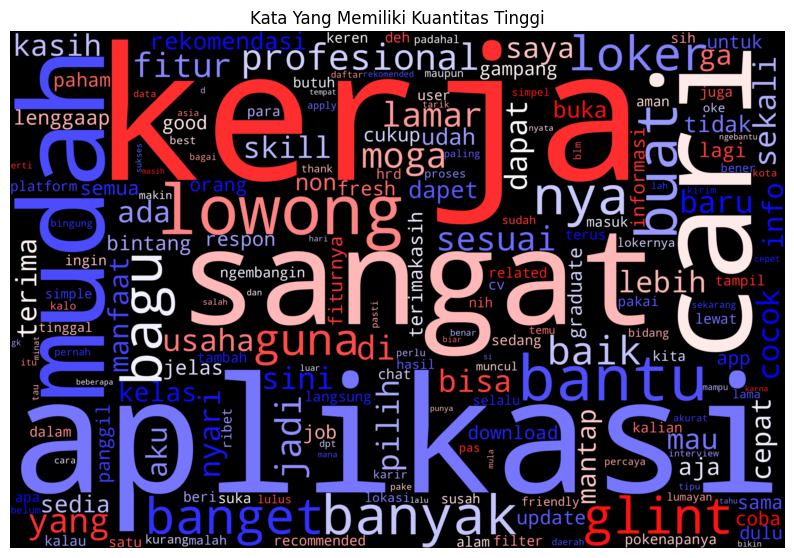

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


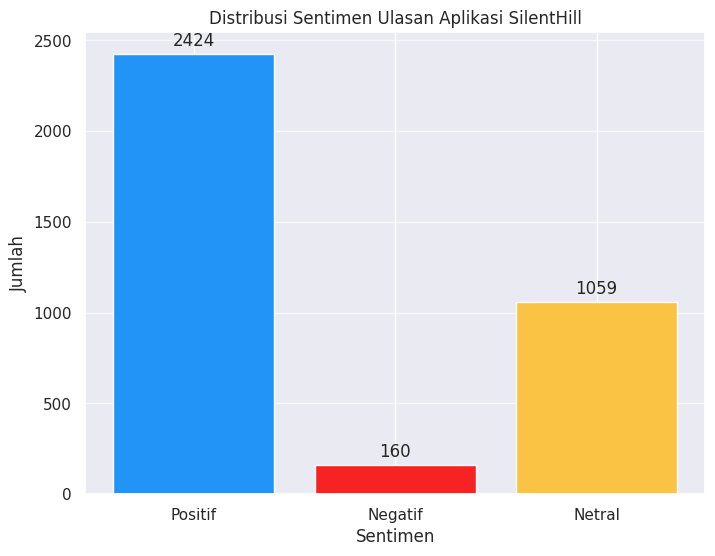

In [38]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")


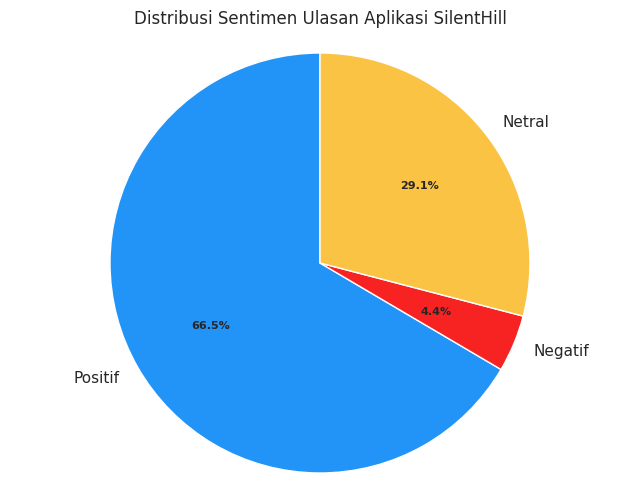

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SilentHill")

In [40]:
data = data.replace({'Positif':0, 'Netral':1, 'Negatif':2})
data

,content,content_en,sentimen
0,yeee,yeee,1
1,good,good,0
2,terimakasih,Thank you.,1
3,baik,Okay.,0
4,moga dapet lokor pangilan kerja,Let's see if we can get a job register.,1
...,...,...,...
3638,aplikasi bagus fitur upskill tambah wawas tahu...,Nice upskill feature plus anxious to know the ...,0
3639,aplikasi sangat bantu pencaker utama fresh gra...,the application really helps the main charger ...,0
3640,buat freshgraduete cocok banget cari lowong ke...,make freshgraduete a perfect match looking for...,0
3641,daftar sini lowong di respon cepatt ga cuman k...,This list is available in fast response not on...,0


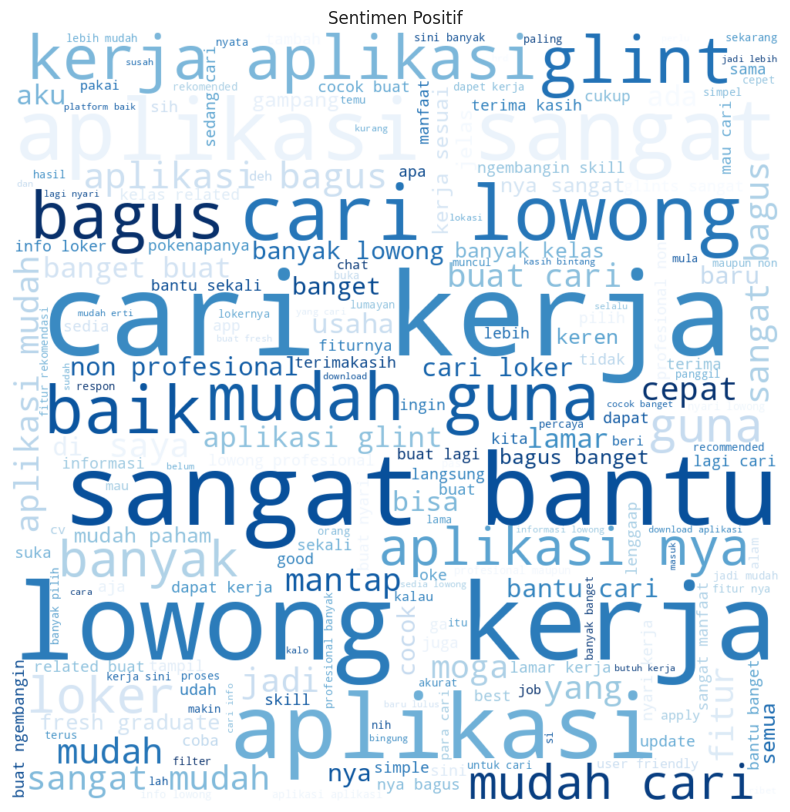

In [69]:
# Visualisasi Wordcould Positif, Negatif, dan Netral

data_positif = data[data['sentimen'] == 0]
data_netral = data[data['sentimen'] == 1]
data_negatif = data[data['sentimen'] == 2]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

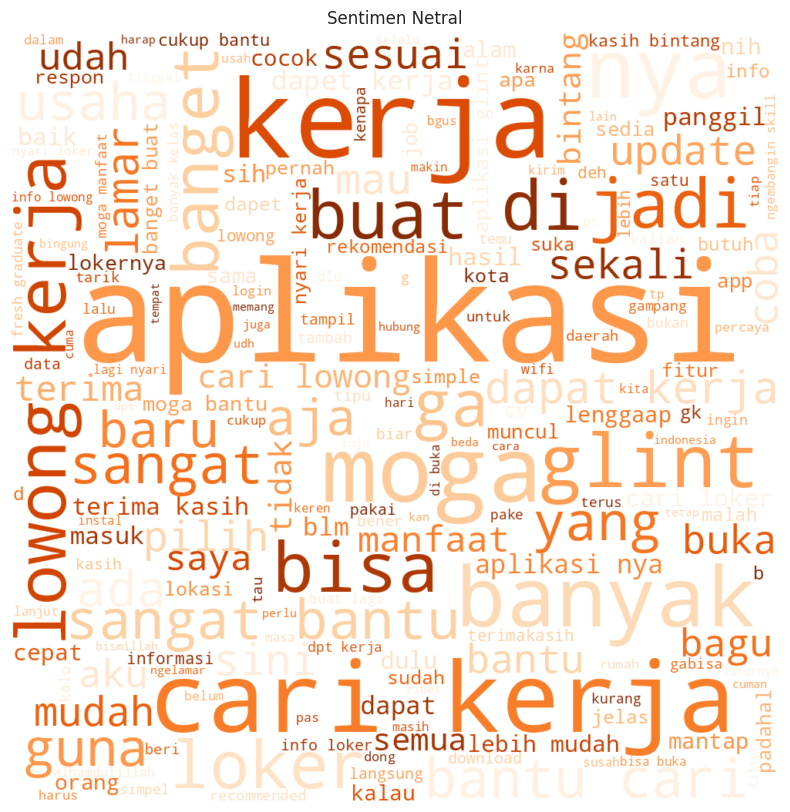

In [70]:
# Sentimen Netral

all_words = ' '.join([reviews for reviews in data_netral['content']])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Netral")
plt.margins(x=0, y=0)
plt.show()

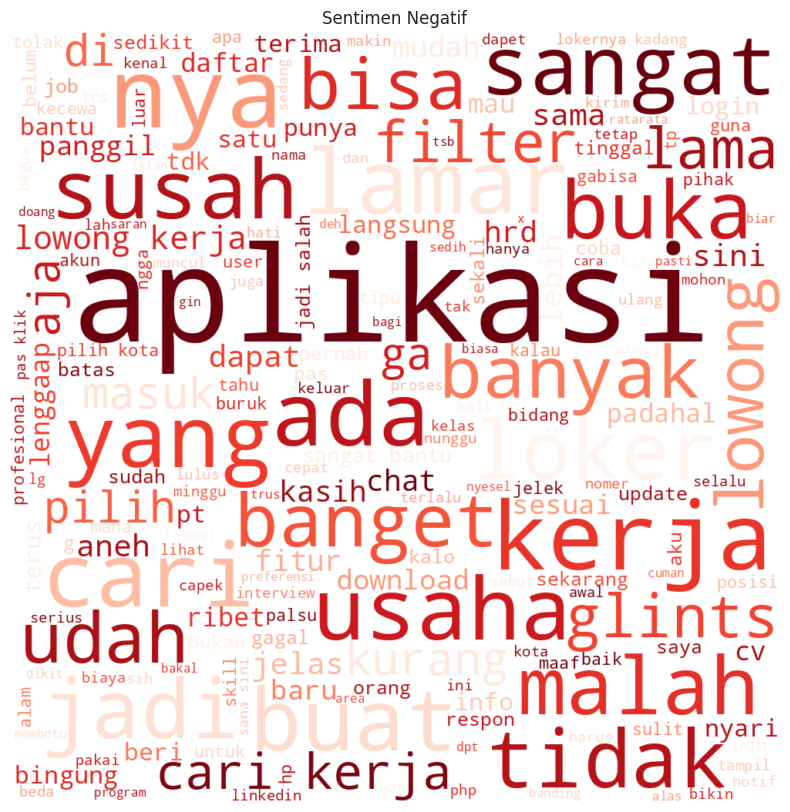

In [71]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [72]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
0    2424
1    1059
2     160
Name: count, dtype: int64

# **Data Preparation**

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [75]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [76]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

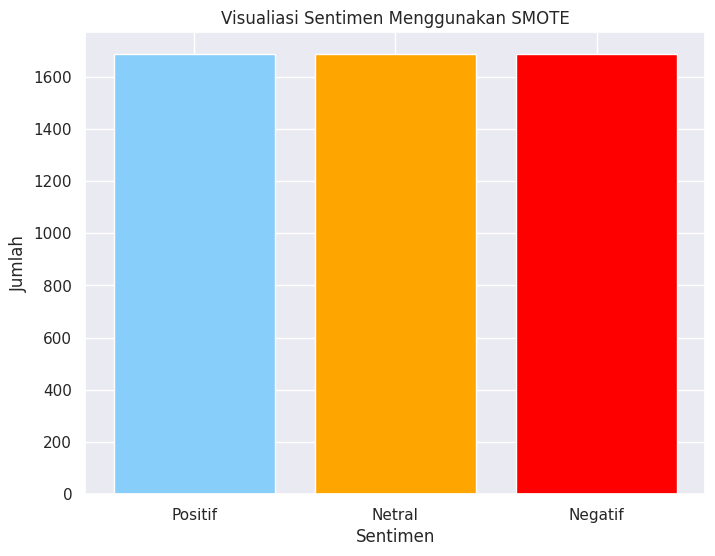

In [77]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'orange', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Netral', 'Negatif'])
plt.show()

# **Modeling**


In [78]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [79]:
y_pred = naive_bayes.predict(X_test_vec)

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Netral', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7218664226898445

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.80      0.85      0.83       738
      Netral       0.59      0.48      0.53       308
     Negatif       0.20      0.26      0.23        47

    accuracy                           0.72      1093
   macro avg       0.53      0.53      0.53      1093
weighted avg       0.72      0.72      0.72      1093



In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[628  91  19]
 [131 149  28]
 [ 22  13  12]]

Accuracy =  0.7218664226898445


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

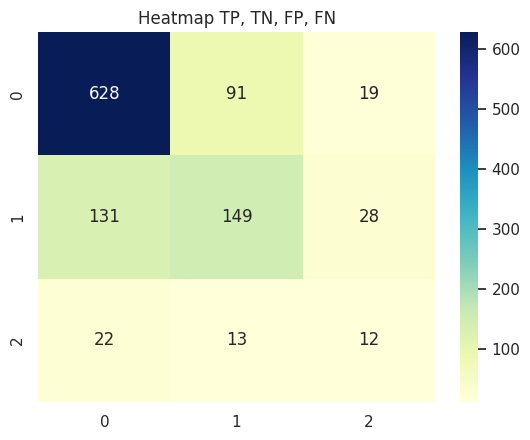

In [83]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1', '2'],
                         index=['0', '1', '2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [84]:
# Slicing the confusion matrix

print('\nTrue Positives (TP):', cm[0, 0])
print('False Negatives (FN) for Positive class:', cm[0, 1] + cm[0, 2])
print('False Positives (FP) for Positive class:', cm[1, 0] + cm[2, 0])
print('True Negatives (TN) for Negative class:', cm[1, 1])
print('False Negatives (FN) for Negative class:', cm[1, 2])
print('False Positives (FP) for Negative class:', cm[2, 1])
print('True Negatives (TN) for Neutral class:', cm[2, 2])


True Positives (TP): 628
False Negatives (FN) for Positive class: 110
False Positives (FP) for Positive class: 153
True Negatives (TN) for Negative class: 149
False Negatives (FN) for Negative class: 28
False Positives (FP) for Negative class: 13
True Negatives (TN) for Neutral class: 12


In [86]:
tp = cm[0, 0]
fn_pos = cm[0, 1] + cm[0, 2]
fp_pos = cm[1, 0] + cm[2, 0]
tn_neg = cm[1, 1]
fn_neg = cm[1, 2]
fp_neg = cm[2, 1]
tn_neu = cm[2, 2]

total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

In [87]:
# Calculate classification Accuracy
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

classification_accuracy = correct / total
print(f'\nClassification Accuracy: {classification_accuracy:.4f}')


Classification Accuracy: 0.7219


In [88]:
# Calculate Classification Error
total_instances = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
misclassified_instances = fn_pos + fp_pos + fn_neg + fp_neg

classification_error = misclassified_instances / total_instances
print(f'\nClassification Error: {classification_error:.4f}')


Classification Error: 0.2781


# **Testing**


In [95]:
# Contoh Prediksi Teks Baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : bagus banget sangat memudahkan untuk mendapatkan pekerjaan
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 98.30%
Probabilitas: 98.29789274932132 %


In [94]:
# Contoh Prediksi Teks Baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : jelek , aplikasi sangat lama untuk dibuka , kecewa dan sangat buruk
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 99.77%
Probabilitas: 99.76941022881819 %


In [99]:
# Contoh Prediksi Teks Baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 2:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][2] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : cukup membantu
Hasil Analisis Sentimen Untuk Teks Baru: Netral
Probabilitas: 51.00%
Probabilitas: 51.00077084658591 %
